In [1]:
import os
import glob
import rasterio as rio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [8]:
# Read in data
df_2020 = pd.read_csv('../data/img_scout_dfs/2020/INC_coreg_skysat_scout_2020.csv')
df_2021 = pd.read_csv('../data/img_scout_dfs/2021/INC_skysat_scout_2021.csv')
df_2022 = pd.read_csv('../data/img_scout_dfs/2022/INC_skysat_scout_2022.csv')

dfs = [df_2020, df_2021, df_2022]

In [3]:
df_2020.columns

Index(['acquired', 'plot', 'blue', 'green', 'red', 'nir', 'row', 'panel',
       'Date', 'Treatment', 'Block', 'PM_severity', 'DM_severity', 'total_dis',
       'geometry', 'centroid', 'PM_inc', 'DM_inc'],
      dtype='object')

In [7]:
# Add VIs
# add vis
def add_vis(df):
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
    df['grvi']=(df['green']-df['red'])/(df['green']+df['red'])
    df['bgvi'] = df['blue']-df['green']/df['blue']+df['green']

    df['gcc']=df['green']/(df['green']+df['red']+df['blue'])
    df['gri']=df['green']/df['red']
    #df['sr']= df['nir']/df['red']
    #df['msr']= ((df['nir']/df['red'])-1)/(np.sqrt((df['nir']/df['red'])+1))
    #df['dvi']= df['nir']-df['red']
    #df['nirv']= df['ndvi']*df['nir']
    #df['tvi']=0.5*(120*(df['nir']-df['green'])-200*(df['red']-df['green']))
    return df

In [9]:
dfs = [add_vis(df) for df in dfs] 

In [10]:
dates = df_2020.Date.unique()
daily_dfs_20 = []

for date in dates:
    daily_df = df_2020[df_2020['Date']==date]
    daily_dfs_20.append(daily_df)

daily_dfs_20[0]
#for daily_df in daily_dfs_20:
    

,acquired,plot,blue,green,red,nir,row,panel,Date,Treatment,...,PM_inc,DM_inc,ndvi,evi,savi,arvi,grvi,bgvi,gcc,gri
0,20200618,1,0.040044,0.077491,0.071216,0.353575,1,1,2020-06-18,5.0,...,0.0,0.0,0.664702,0.476784,0.457984,0.550895,0.042197,-1.817615,0.410546,1.088113
1,20200618,2,0.044693,0.081807,0.077133,0.336587,1,2,2020-06-18,9.0,...,0.0,5.0,0.627123,0.442999,0.425929,0.508816,0.029403,-1.703900,0.401735,1.060588
2,20200618,4,0.040121,0.076396,0.070693,0.343482,1,4,2020-06-18,18.0,...,0.0,0.0,0.658633,0.464962,0.447599,0.544620,0.038776,-1.787612,0.408077,1.080681
3,20200618,5,0.034862,0.073497,0.060772,0.358279,1,5,2020-06-18,6.0,...,0.0,0.0,0.709953,0.508925,0.485566,0.610381,0.094766,-1.999851,0.434554,1.209374
4,20200618,6,0.039300,0.075070,0.068893,0.337817,1,6,2020-06-18,2.0,...,0.0,0.0,0.661216,0.461615,0.444889,0.548540,0.042904,-1.795808,0.409629,1.089656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20200618,154,0.035947,0.070447,0.061180,0.340310,10,10,2020-06-18,12.0,...,0.0,5.0,0.695235,0.485346,0.464448,0.594991,0.070401,-1.853362,0.420393,1.151466
96,20200618,155,0.036357,0.069650,0.060089,0.338846,10,11,2020-06-18,3.0,...,0.0,0.0,0.698752,0.488464,0.465145,0.603370,0.073692,-1.809710,0.419335,1.159108
97,20200618,156,0.035897,0.070087,0.059337,0.335133,10,12,2020-06-18,10.0,...,0.0,0.0,0.699158,0.484899,0.462503,0.603854,0.083061,-1.846473,0.423945,1.181170
98,20200618,158,0.036655,0.070268,0.061471,0.339868,10,14,2020-06-18,16.0,...,0.0,10.0,0.693670,0.485424,0.463305,0.595043,0.066774,-1.810089,0.417283,1.143105


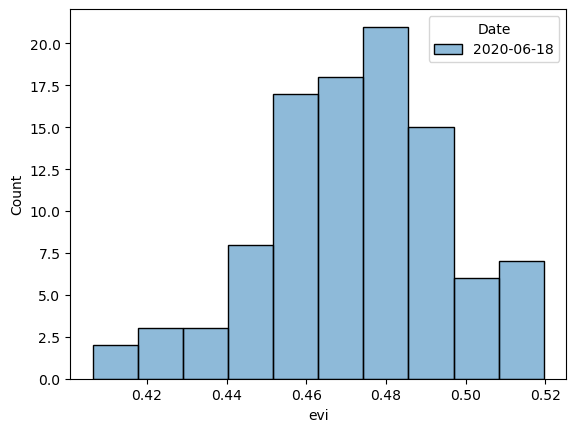

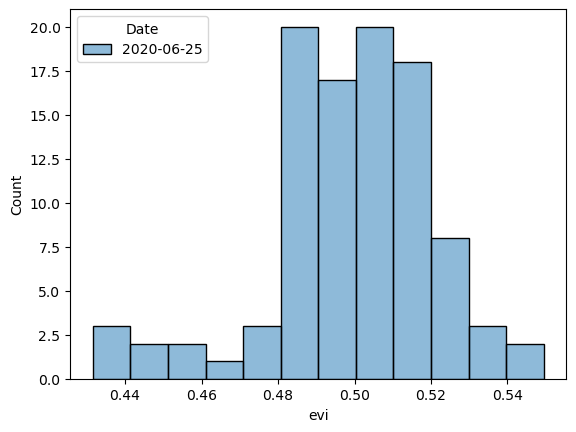

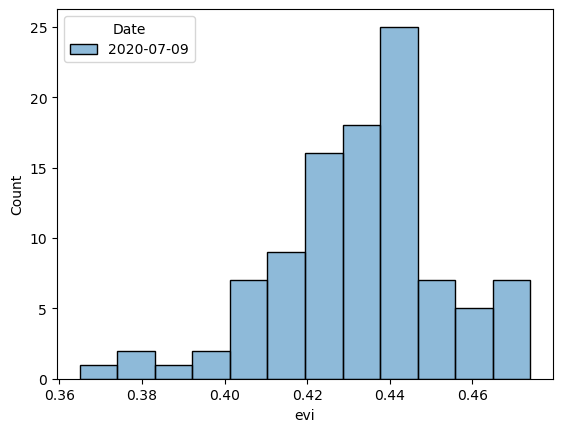

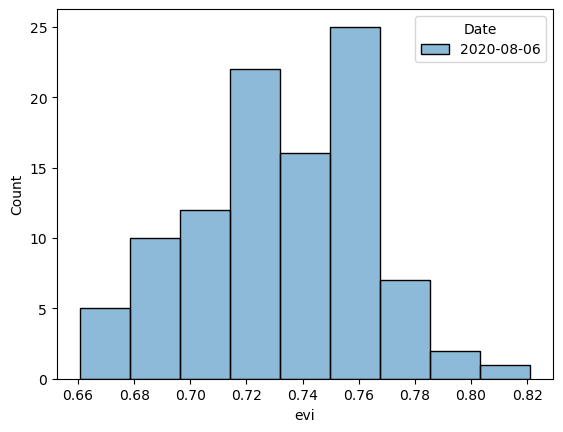

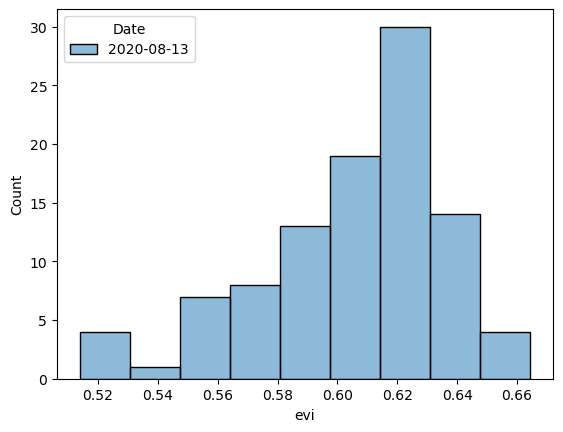

In [15]:
# Plot distributions of Vis by date

for df in daily_dfs_20:
    sns.histplot(data=df, x='evi', hue='Date')
    plt.show()

In [ ]:
#https://campus.datacamp.com/courses/manipulating-time-series-data-in-python/basic-time-series-metrics-resampling?ex=1